In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re
import nltk
from tqdm import tqdm
import scipy
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
train=pd.read_csv("train.csv")

In [3]:
test=pd.read_csv("test.csv")

In [ ]:
train

In [ ]:
test

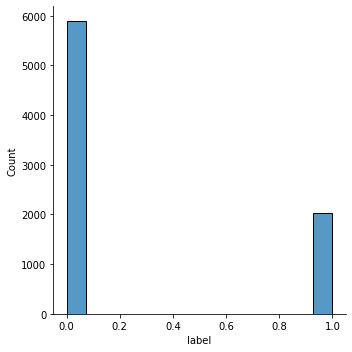

In [7]:
import seaborn as sns
sns.displot(train['label'])

In [ ]:
label_cnt = train['label'].value_counts()
label_cnt

In [ ]:
label_pct = train['label'].value_counts() / len(train)
label_pct

In [ ]:
label = train['label']

train.drop(['label'], axis=1, inplace=True)
train

In [ ]:
combi = train.append(test)
combi

In [ ]:
tweets = combi['tweet']

count_words = tweets.str.findall(r'(\w+)').str.len()
print(count_words.sum())

In [ ]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:


""" Cleaning Tweets """
tweets = tweets.str.lower()

# removing special characters and numbers
tweets = tweets.apply(lambda x : re.sub("[^a-z\s]","",x) )

# remove hash tags
tweets = tweets.str.replace("#", " ")

#remove words less than 2 character
tweets = tweets.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# removing stopwords
stopwords = set(stopwords.words("english"))
tweets = tweets.apply(lambda x : " ".join(word for word in x.split() if word not in stopwords ))


count_words = tweets.str.findall(r'(\w+)').str.len()
print(count_words.sum())

In [20]:
most_freq_words = pd.Series(' '.join(tweets).lower().split()).value_counts()[:25]
tweets = tweets.apply(lambda x : " ".join(word for word in x.split() if word not in most_freq_words ))
print(most_freq_words)

count_words = tweets.str.findall(r'(\w+)').str.len()
print(count_words.sum())

iphone         4964
apple          3583
samsung        1762
new            1431
phone          1184
sony           1051
follow          882
ipad            641
love            548
like            538
life            510
android         487
ios             473
day             454
instagram       452
cute            407
photo           393
gain            387
today           386
get             384
galaxy          364
back            359
got             348
photography     348
music           346
dtype: int64
92093


In [21]:
from collections import Counter
from itertools import chain


v = tweets.str.split().tolist() 

c = Counter(chain.from_iterable(v))

tweets = [' '.join([j for j in i if c[j] > 1]) for i in v]

total_word = 0
for x,word in enumerate(tweets):
    num_word = len(word.split())
 
    total_word = total_word + num_word
print(total_word)

74101


In [22]:
X = np.array(tweets[: len(train)])
y = label

In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [42]:
le = preprocessing.LabelEncoder()
for col in train.columns:
    train[col] = le.fit_transform(train[col])
train.head()

,id,tweet
0,0,399
1,1,2276
2,2,6748
3,3,3719
4,4,6890


In [43]:
from sklearn.model_selection import train_test_split

X_train,X_val, y_train, y_val = train_test_split(X,y, stratify=y, test_size=0.3, random_state=1)
X_train.shape, y_train.shape, X_val.shape,y_val.shape

((5544,), (5544,), (2376,), (2376,))